# import necessery libraries.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
)

# Models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Balanced Design
from imblearn.over_sampling import SMOTE
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
%cd data

/content/data


# read feature.csv

In [ ]:
# ============================================
# 1. Load dữ liệu
# ============================================
import pandas as pd
import numpy as np

df = pd.read_csv("features.csv")

print("Shape:", df.shape)
df.head()


Shape: (4669, 724)


,subject_id,trial_id,label,AF3_alpha_log_power,AF3_beta_log_power,AF3_delta_log_power,AF3_mean_amp,AF3_peak_amp,AF3_peak_lat,AF3_theta_log_power,...,TPP7h_peak_amp,TPP7h_peak_lat,TPP7h_theta_log_power,TPP8h_alpha_log_power,TPP8h_beta_log_power,TPP8h_delta_log_power,TPP8h_mean_amp,TPP8h_peak_amp,TPP8h_peak_lat,TPP8h_theta_log_power
0,sub-03,0,1,-13.213906,-12.694797,-12.015079,-0.000007,-7.144108e-08,0.418,-12.273278,...,0.000002,0.309,-12.225700,-11.927724,-12.437134,-11.480321,-3.992515e-06,0.000010,0.463,-11.852953
1,sub-03,1,0,-12.829155,-13.013405,-12.242465,0.000002,8.422218e-06,0.560,-12.265361,...,0.000010,0.430,-11.230701,-11.969571,-12.316622,-11.712483,-7.286959e-07,0.000009,0.429,-11.694240
2,sub-03,2,0,-12.392271,-12.831872,-12.171232,0.000003,6.386965e-06,0.456,-12.213064,...,0.000024,0.568,-11.999837,-11.981506,-12.157160,-11.583211,1.157716e-05,0.000021,0.575,-11.814481
3,sub-03,3,2,-13.291474,-12.855978,-12.442979,-0.000002,4.469211e-06,0.366,-12.446906,...,0.000012,0.408,-11.930245,-12.397007,-12.715145,-11.676552,-4.853110e-06,0.000010,0.404,-11.621606
4,sub-03,4,0,-12.326804,-13.151014,-12.369475,0.000002,7.467432e-06,0.445,-12.253310,...,0.000011,0.452,-11.954632,-11.718433,-12.225771,-11.535228,7.453179e-06,0.000024,0.447,-11.419291


In [ ]:
# ============================================
# 2. Tách X / y
# ============================================
X = df.drop(columns=['label', 'subject_id', 'trial_id'])
y = df['label']

print("Classes distribution before balancing:")
print(y.value_counts())


Classes distribution before balancing:
label
0    3560
2     557
1     552
Name: count, dtype: int64


In [ ]:
# ============================================
# 3. Balanced design (SMOTE Oversampling)
# ============================================
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\n--- Sau khi cân bằng ---")
print("Phân phối nhãn trong tập huấn luyện sau SMOTE:\n", y_train_smote.value_counts())



--- Sau khi cân bằng ---
Phân phối nhãn trong tập huấn luyện sau SMOTE:
 label
0    2848
1    2848
2    2848
Name: count, dtype: int64



Bắt đầu huấn luyện mô hình XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:32:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Hoàn tất huấn luyện!

--- KẾT QUẢ ĐÁNH GIÁ CỦA XGBOOST TRÊN TẬP KIỂM TRA GỐC ---
Độ chính xác (Accuracy): 0.8287
Độ chính xác cân bằng (Balanced Accuracy): 0.6063

Báo cáo phân loại (Classification Report):
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       712
           1       0.55      0.54      0.54       110
           2       0.52      0.33      0.40       112

    accuracy                           0.83       934
   macro avg       0.66      0.61      0.62       934
weighted avg       0.81      0.83      0.82       934


Ma trận nhầm lẫn (Confusion Matrix):


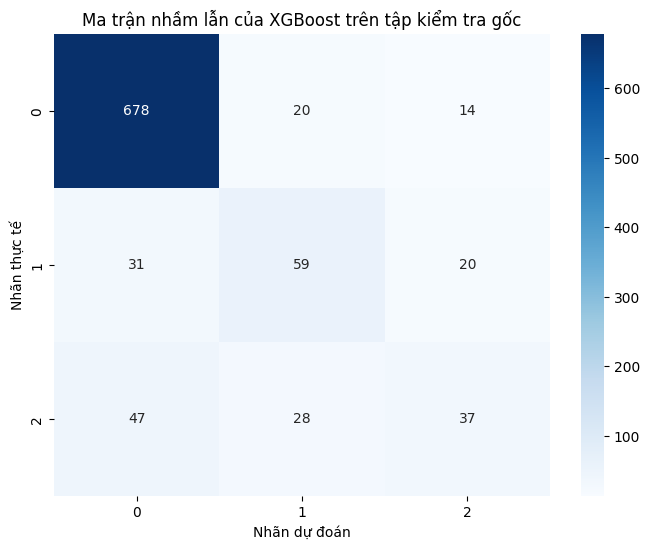

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier(
    objective='multi:softmax', # Xác định bài toán là đa lớp
    num_class=3,               # Số lượng lớp của bạn
    eval_metric='mlogloss',    # Metric để đánh giá trong quá trình huấn luyện
    use_label_encoder=False,   # Tắt cảnh báo không cần thiết
    random_state=42
)

print("\nBắt đầu huấn luyện mô hình XGBoost...")
# Huấn luyện mô hình trên dữ liệu đã được cân bằng bởi SMOTE
model.fit(X_train_smote, y_train_smote)
print("Hoàn tất huấn luyện!")


# --- Bước 4: Dự đoán và Đánh giá trên tập kiểm tra gốc ---
# Sử dụng mô hình đã huấn luyện để dự đoán trên tập test gốc
y_pred = model.predict(X_test)

print("\n--- KẾT QUẢ ĐÁNH GIÁ CỦA XGBOOST TRÊN TẬP KIỂM TRA GỐC ---")

# Tính toán các chỉ số
accuracy = accuracy_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Độ chính xác (Accuracy): {accuracy:.4f}")
print(f"Độ chính xác cân bằng (Balanced Accuracy): {balanced_acc:.4f}")

# Hiển thị báo cáo phân loại chi tiết
# So sánh báo cáo này với kết quả của Random Forest
print("\nBáo cáo phân loại (Classification Report):")
print(classification_report(y_test, y_pred))

# Hiển thị ma trận nhầm lẫn
print("\nMa trận nhầm lẫn (Confusion Matrix):")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Nhãn dự đoán')
plt.ylabel('Nhãn thực tế')
plt.title('Ma trận nhầm lẫn của XGBoost trên tập kiểm tra gốc')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Định nghĩa không gian tham số để tìm kiếm
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'n_estimators': [200, 300, 400, 500],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Khởi tạo mô hình XGBoost
model_xgb = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Sử dụng RandomizedSearchCV để tìm tham số tốt nhất
# scoring='balanced_accuracy' để ưu tiên sự cân bằng giữa các lớp
random_search = RandomizedSearchCV(
    model_xgb,
    param_distributions=param_grid,
    n_iter=50,  # Số lượng tổ hợp tham số sẽ thử
    scoring='balanced_accuracy',
    n_jobs=-1,  # Sử dụng tất cả các CPU
    cv=3,       # Cross-validation 3 lần
    verbose=2,
    random_state=42
)

# Tìm kiếm trên dữ liệu train đã cân bằng
random_search.fit(X_train_smote, y_train_smote)

print("Tham số tốt nhất tìm được:")
print(random_search.best_params_)

# Lấy ra mô hình tốt nhất
best_model = random_search.best_estimator_

# Đánh giá mô hình tốt nhất trên tập test gốc
y_pred_best = best_model.predict(X_test)
print("\n--- KẾT QUẢ SAU KHI TỐI ƯU HÓA THAM SỐ ---")
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:36:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Tham số tốt nhất tìm được:
{'subsample': 0.9, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.15, 'gamma': 0, 'colsample_bytree': 0.9}

--- KẾT QUẢ SAU KHI TỐI ƯU HÓA THAM SỐ ---
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       712
           1       0.59      0.52      0.55       110
           2       0.52      0.32      0.40       112

    accuracy                           0.83       934
   macro avg       0.67      0.60      0.62       934
weighted avg       0.81      0.83      0.82       934

